## Code of HomeworkAssignment 1

### Question 1: [Index] S&P 500 Stocks Added to the Index
Which year had the highest number of additions?



In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

# Step 1: Read the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)

# Step 2: Find the relevant table
df = tables[0]  # Table 1 is the current S&P 500 table, Table 2 is additions/removals

print('Releveant columns in the table:', df.columns.tolist())

# Filter relevant columns
df = df[['Symbol', 'Date added']] 

# Step 3: Drop rows without 'Added' dates
df = df.dropna(subset=['Date added'])

# Step 4: Convert 'Added' to datetime and extract year
df['Year Added'] = pd.to_datetime(df['Date added']).dt.year

# Step 5: Exclude 1957 (index founding year)
df = df[df['Year Added'] != 1957]

# Step 6: Count number of additions per year
year_counts = df['Year Added'].value_counts().sort_index()

# Step 7: Find the year with the highest number of additions (most recent if tie)
max_additions = year_counts.max()
max_years = year_counts[year_counts == max_additions].index
result_year = max(max_years)

Releveant columns in the table: ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded']


In [2]:
# Output the result
print(f"\n\nYear with highest number of additions (excluding 1957): {result_year}")




Year with highest number of additions (excluding 1957): 2017


<Axes: xlabel='Year Added'>

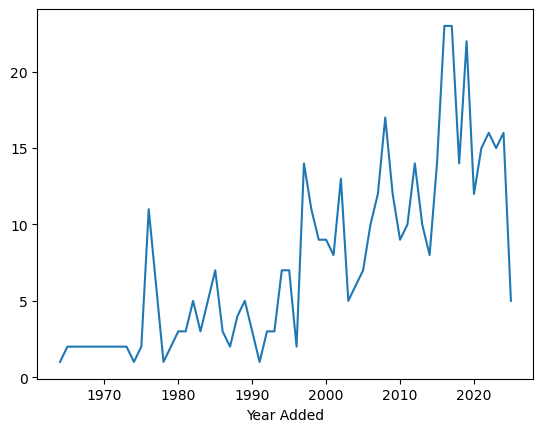

In [3]:
year_counts.plot()

In [4]:
year_counts.sort_values()

Year Added
1964     1
1978     1
1974     1
1991     1
1972     2
1987     2
1996     2
1970     2
1965     2
1979     2
1975     2
1969     2
1973     2
1980     3
1983     3
1993     3
1992     3
1986     3
1981     3
1988     4
2003     5
2025     5
1984     5
1982     5
1989     5
2004     6
1985     7
1994     7
1995     7
2005     7
2001     8
2014     8
1999     9
2010     9
2000     9
2013    10
2006    10
2011    10
1998    11
1976    11
2007    12
2020    12
2009    12
2002    13
2018    14
1997    14
2012    14
2015    14
2021    15
2023    15
2024    16
2022    16
2008    17
2019    22
2016    23
2017    23
Name: count, dtype: int64

In [5]:
df

,Symbol,Date added,Year Added
1,AOS,2017-07-26,2017
3,ABBV,2012-12-31,2012
4,ACN,2011-07-06,2011
5,ADBE,1997-05-05,1997
6,AMD,2017-03-20,2017
...,...,...,...
498,XYL,2011-11-01,2011
499,YUM,1997-10-06,1997
500,ZBRA,2019-12-23,2019
501,ZBH,2001-08-07,2001


In [6]:
tables[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [7]:
tables[1]

Date  Added                                Removed  \
                   Date Ticker                       Security  Ticker   
0          May 19, 2025   COIN                       Coinbase     DFS   
1        March 24, 2025   DASH                       DoorDash     BWA   
2        March 24, 2025    TKO             TKO Group Holdings     TFX   
3        March 24, 2025    WSM          Williams-Sonoma, Inc.      CE   
4        March 24, 2025    EXE                  Expand Energy     FMC   
..                  ...    ...                            ...     ...   
367   December 11, 1998   CPWR                      Compuware     SUN   
368       June 17, 1997    CCI  Countrywide Credit Industries     USL   
369  September 30, 1994    NCC                  National City     MCK   
370        July 1, 1976    BUD                 Anheuser Busch     HNG   
371        July 1, 1976    DIS        The Walt Disney Company     AYE   

                                                                     Reason  
                Security                                             Reason  
0     Discover Financial  S&P 500 constituent Capital One Financial Corp...  
1             BorgWarner                   Market capitalization change.[5]  
2               Teleflex                   Market capitalization change.[5]  
3               Celanese                   Market capitalization change.[5]  
4        FMC Corporation                   Market capitalization change.[5]  
..                   ...                                                ...  
367           SunAmerica                     AIG purchased SunAmerica.[262]  
368               USLife                          AIG acquired USLife.[263]  
369             McKesson  McKesson sold PCS Health Services to Eli Lilly...  
370  Houston Natural Gas  Major restructuring of S&P 500 to have fewer i...  
371     Allegheny Energy  Major restructuring of S&P 500 to have fewer i...  

[372 rows x 6 columns]

## Question 2. [Macro] Indexes YTD (as of 1 May 2025)
How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?

In [8]:
# Step 1: Define index tickers and names
tickers = {
    'United States': '^GSPC',
    'China': '000001.SS',
    'Hong Kong': '^HSI',
    'Australia': '^AXJO',
    'India': '^NSEI',
    'Canada': '^GSPTSE',
    'Germany': '^GDAXI',
    'United Kingdom': '^FTSE',
    'Japan': '^N225',
    'Mexico': '^MXX',
    'Brazil': '^BVSP'
}

# Step 2: Fetch data and compute YTD returns
start_date = '2025-01-01'
end_date = '2025-05-01'

data = yf.download('^BVSP', start=start_date, end=end_date, progress=True)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2025-01-02,120125.0,120782.0,119120.0,120283.0,9373600
2025-01-03,118533.0,120356.0,118404.0,120125.0,9804400
2025-01-06,120022.0,120322.0,118534.0,118534.0,9685600
2025-01-07,121163.0,121713.0,120022.0,120022.0,11116400
2025-01-08,119625.0,121160.0,119351.0,121160.0,10230700


In [9]:

returns = {}

for country, ticker in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date, progress=True)
    if not data.empty:
        first_close = data['Close'].iloc[0]
        last_close = data['Close'].iloc[-1]
        ytd_return = ((last_close - first_close) / first_close) * 100
        returns[country] = ytd_return
    else:
        returns[country] = None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
returns.keys()

dict_keys(['United States', 'China', 'Hong Kong', 'Australia', 'India', 'Canada', 'Germany', 'United Kingdom', 'Japan', 'Mexico', 'Brazil'])

In [11]:
# check first key

returns['United States']

Ticker
^GSPC   -5.103301
dtype: float64

In [12]:
# Step 3: Convert to DataFrame

# Convert the returns dict (with Series values) to a flat pandas Series
returns_series = pd.Series({k: float(v.values[0]) for k, v in returns.items()})

# Convert the Series 'better_than_sp500' to a DataFrame with specified column names
returns_df = returns_series.reset_index()
returns_df.columns = ['Country', 'YTD Return']

print("\n📊 Year-to-Date Returns (1 Jan – 1 May 2025):\n")
print(returns_df.to_markdown())


📊 Year-to-Date Returns (1 Jan – 1 May 2025):

|    | Country        |   YTD Return |
|---:|:---------------|-------------:|
|  0 | United States  |    -5.1033   |
|  1 | China          |     0.504817 |
|  2 | Hong Kong      |    12.72     |
|  3 | Australia      |    -0.9145   |
|  4 | India          |     2.49042  |
|  5 | Canada         |    -0.226126 |
|  6 | Germany        |    12.3464   |
|  7 | United Kingdom |     2.84259  |
|  8 | Japan          |    -8.29793  |
|  9 | Mexico         |    13.0494   |
| 10 | Brazil         |    12.4387   |


In [13]:
# Step 4: Compare to S&P 500 return
sp500_return = returns_series.loc['United States']
better_than_sp500 = returns_series[returns_series > sp500_return]

# Step 5: Count how many indexes outperformed
count = len(better_than_sp500)

In [14]:
print(f"Number of indexes that outperformed the US (S&P 500) as of 1 May 2025: {count}")

Number of indexes that outperformed the US (S&P 500) as of 1 May 2025: 9


## Question 3. [Index] S&P 500 Market Corrections Analysis
Calculate the median duration (in days) of significant market corrections in the S&P 500 index.

In [15]:
# Step 1: Download historical S&P 500 data (1950 - present)
sp500 = yf.download('^GSPC', start='1950-01-01', progress=True)

# Step 2: Track all-time highs
sp500['AllTimeHigh'] = sp500['Close'].cummax()
sp500

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,AllTimeHigh
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.850000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000
...,...,...,...,...,...,...
2025-05-27,5921.540039,5924.330078,5854.069824,5854.069824,5366380000,6144.149902
2025-05-28,5888.549805,5939.919922,5881.879883,5925.540039,4665050000,6144.149902


In [16]:
sp500.columns = sp500.columns.droplevel(1)
sp500

Price,Close,High,Low,Open,Volume,AllTimeHigh
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.850000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000
...,...,...,...,...,...,...
2025-05-27,5921.540039,5924.330078,5854.069824,5854.069824,5366380000,6144.149902
2025-05-28,5888.549805,5939.919922,5881.879883,5925.540039,4665050000,6144.149902
2025-05-29,5912.169922,5943.129883,5873.799805,5939.959961,4569750000,6144.149902


In [17]:
sp500.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'AllTimeHigh'], dtype='object', name='Price')

In [18]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22',
               '2025-05-23', '2025-05-27', '2025-05-28', '2025-05-29',
               '2025-05-30', '2025-06-02'],
              dtype='datetime64[ns]', name='Date', length=18974, freq=None)

In [19]:
# Step 3: Identify new highs
all_time_highs = sp500[sp500['Close'] == sp500['AllTimeHigh']]
all_time_highs

Price,Close,High,Low,Open,Volume,AllTimeHigh
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.850000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000
...,...,...,...,...,...,...
2024-12-04,6086.490234,6089.839844,6061.060059,6069.390137,4003390000,6086.490234
2024-12-06,6090.270020,6099.970215,6079.979980,6081.379883,3924830000,6090.270020
2025-01-23,6118.709961,6118.729980,6074.669922,6076.319824,4432250000,6118.709961


In [20]:
# Step 4: Iterate through each pair of all-time highs to find corrections
corrections = []

high_dates = all_time_highs.index.to_list()
for i in range(1, len(high_dates)):
    start = high_dates[i - 1]
    end = high_dates[i]
    segment = sp500.loc[start:end]

    if len(segment) < 2:
        continue

    max_price = segment['Close'].iloc[0]
    min_price = segment['Close'].min()
    min_date = segment['Close'].idxmin()

    drawdown_pct = (max_price - min_price) / max_price * 100
    duration = (min_date - start).days

    if drawdown_pct > 5:
        corrections.append({
            'Start': start,
            'Low': min_date,
            'Drawdown (%)': round(drawdown_pct, 2),
            'Duration (days)': duration
        })

# Step 5: Create DataFrame
corrections_df = pd.DataFrame(corrections)

# Step 6: Compute duration percentiles
percentiles = corrections_df['Duration (days)'].quantile([0.25, 0.5, 0.75])

# Display results
print("\n📉 S&P 500 Market Corrections Over 5%:")
print(corrections_df.sort_values(by='Drawdown (%)', ascending=False).head(10).to_markdown())

print("\n📊 Duration Percentiles (days):")
print(percentiles.to_frame(name='Duration (days)').to_markdown())



📉 S&P 500 Market Corrections Over 5%:
|    | Start               | Low                 |   Drawdown (%) |   Duration (days) |
|---:|:--------------------|:--------------------|---------------:|------------------:|
| 56 | 2007-10-09 00:00:00 | 2009-03-09 00:00:00 |          56.78 |               517 |
| 54 | 2000-03-24 00:00:00 | 2002-10-09 00:00:00 |          49.15 |               929 |
| 24 | 1973-01-11 00:00:00 | 1974-10-03 00:00:00 |          48.2  |               630 |
| 22 | 1968-11-29 00:00:00 | 1970-05-26 00:00:00 |          36.06 |               543 |
| 65 | 2020-02-19 00:00:00 | 2020-03-23 00:00:00 |          33.92 |                33 |
| 35 | 1987-08-25 00:00:00 | 1987-12-04 00:00:00 |          33.51 |               101 |
| 15 | 1961-12-12 00:00:00 | 1962-06-26 00:00:00 |          27.97 |               196 |
| 27 | 1980-11-28 00:00:00 | 1982-08-12 00:00:00 |          27.11 |               622 |
| 68 | 2022-01-03 00:00:00 | 2022-10-12 00:00:00 |          25.43 |              

In [21]:
print(f"Median duration (in days) of significant market corrections in the S&P 500 index: {percentiles[0.50]} days")

Median duration (in days) of significant market corrections in the S&P 500 index: 39.0 days


## Question 4. [Stocks] Earnings Surprise Analysis for Amazon (AMZN)
Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.

In [22]:
# Step 1: Load earnings data
earnings_df = pd.read_csv("ha1_Amazon.csv", delimiter=';')#, parse_dates=['Earnings Date'])
earnings_df = earnings_df.sort_values('Earnings Date')
earnings_df.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
88,AMZN,"Amazon.com, Inc.","April 22, 2004 at 12 AM EDT",0.01,0.01,+16.87
64,AMZN,"Amazon.com, Inc.","April 22, 2010 at 12 AM EDT",0.03,0.03,+9.05
96,AMZN,"Amazon.com, Inc.","April 23, 2002 at 12 AM EDT",-,-,+89.2
72,AMZN,"Amazon.com, Inc.","April 23, 2008 at 12 AM EDT",0.02,0.02,+5.13
68,AMZN,"Amazon.com, Inc.","April 23, 2009 at 12 AM EDT",0.02,0.02,+32.6


In [23]:
earnings_df['Positive Surprise'] = earnings_df['Reported EPS'] > earnings_df['EPS Estimate'] #| (earnings_df['Surprise (%)'] > 0)
earnings_df.head()

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),Positive Surprise
88,AMZN,"Amazon.com, Inc.","April 22, 2004 at 12 AM EDT",0.01,0.01,+16.87,False
64,AMZN,"Amazon.com, Inc.","April 22, 2010 at 12 AM EDT",0.03,0.03,+9.05,False
96,AMZN,"Amazon.com, Inc.","April 23, 2002 at 12 AM EDT",-,-,+89.2,False
72,AMZN,"Amazon.com, Inc.","April 23, 2008 at 12 AM EDT",0.02,0.02,+5.13,False
68,AMZN,"Amazon.com, Inc.","April 23, 2009 at 12 AM EDT",0.02,0.02,+32.6,False


In [24]:
earnings_df["Positive Surprise"].value_counts()

Positive Surprise
False    70
True     47
Name: count, dtype: int64

In [25]:
earnings_df.dropna(subset=['Symbol', 'Company', 'Earnings Date'], inplace=True)
earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 88 to 6
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Symbol             116 non-null    object
 1   Company            116 non-null    object
 2   Earnings Date      116 non-null    object
 3   EPS Estimate       116 non-null    object
 4   Reported EPS       116 non-null    object
 5   Surprise (%)       116 non-null    object
 6   Positive Surprise  116 non-null    bool  
dtypes: bool(1), object(6)
memory usage: 6.5+ KB


In [26]:
# Step 2: Download AMZN stock data
amzn = yf.download('AMZN', progress=True)
amzn = amzn[['Close']]
amzn = amzn.reset_index()
amzn.shape

[*********************100%***********************]  1 of 1 completed


(7056, 2)

In [27]:
amzn.head()

Price,Date,Close
Ticker,,AMZN
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354


In [28]:
amzn.columns = amzn.columns.droplevel(1)
amzn.head()

Price,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354


In [29]:
# Step 3: Calculate 2-day returns for entire price history
returns_all = []

for i in range(len(amzn) - 2):
    day1 = amzn.iloc[i]
    day3 = amzn.iloc[i + 2]
    pct_change = (day3['Close'] / day1['Close'] - 1) * 100
    returns_all.append({
        'Day1': day1['Date'],
        'Day3': day3['Date'],
        '2-Day Return (%)': pct_change
    })

returns_all_df = pd.DataFrame(returns_all)
returns_all_df.head()

,Day1,Day3,2-Day Return (%)
0,1997-05-15,1997-05-19,-12.765910
1,1997-05-16,1997-05-20,-5.421125
2,1997-05-19,1997-05-21,-16.463936
3,1997-05-20,1997-05-22,-14.649446
4,1997-05-21,1997-05-23,5.109736


In [30]:
returns_all_df [ returns_all_df.iloc[:,2] > 15 ]

,Day1,Day3,2-Day Return (%)
13,1997-06-04,1997-06-06,16.913028
32,1997-07-01,1997-07-03,26.117361
33,1997-07-02,1997-07-07,25.901779
34,1997-07-03,1997-07-08,20.435684
35,1997-07-07,1997-07-09,16.145997
...,...,...,...
3761,2012-04-25,2012-04-27,16.680383
3762,2012-04-26,2012-04-30,18.322360
4454,2015-01-28,2015-01-30,16.656241
4455,2015-01-29,2015-02-02,16.899734


In [31]:
# Step 4: Compute 2-day returns for positive earnings surprises
surprise_returns = []

# Convert 'Earnings Date' to datetime, stripping unrecognized timezone
# earnings_df['Earnings Date Clean'] = pd.to_datetime(
#     earnings_df['Earnings Date'].str.replace(r' at .* (AM|PM) [A-Z]+', '', regex=True)
# )

# # Ensure amzn['Date'] is datetime if not already
# if amzn['Date'].dtype == 'O':
#     amzn['Date'] = pd.to_datetime(amzn['Date'])

for _, row in earnings_df[earnings_df['Positive Surprise']].iterrows():
    earnings_date = row['Earnings Date']
    
    # Find the index of the earnings date or nearest trading day after
    match_idx = amzn[amzn['Date'] >= earnings_date].index.min()
    print(f'Matching index for earnings date {earnings_date}: {amzn.iloc[match_idx]["Date"]}')
    if match_idx is None or match_idx > len(amzn) - 2:
        print(f"\n\nNo valid match found for earnings date {earnings_date}. Skipping.")
        continue
    
    close_day1 = amzn.loc[match_idx]['Close']
    close_day3 = amzn.loc[match_idx + 2]['Close']
    ret = (close_day3 / close_day1 - 1) * 100
    
    surprise_returns.append({
        'Earnings Date': earnings_date,
        '2-Day Return (%)': ret,
        'Surprise (%)': row['Surprise (%)']
    })

surprise_df = pd.DataFrame(surprise_returns)
surprise_df.head()

Matching index for earnings date April 24, 2003 at 12 AM EDT: 2003-04-24 00:00:00
Matching index for earnings date April 25, 2013 at 12 AM EDT: 2013-04-25 00:00:00
Matching index for earnings date April 25, 2019 at 4 PM EDT: 2019-04-26 00:00:00
Matching index for earnings date April 26, 2012 at 12 AM EDT: 2012-04-26 00:00:00
Matching index for earnings date April 26, 2018 at 4 PM EDT: 2018-04-27 00:00:00
Matching index for earnings date April 27, 2017 at 4 PM EDT: 2017-04-28 00:00:00
Matching index for earnings date April 27, 2023 at 4 PM EDT: 2023-04-28 00:00:00
Matching index for earnings date April 28, 2016 at 4 PM EDT: 2016-04-29 00:00:00
Matching index for earnings date April 29, 2021 at 4 PM EDT: 2021-04-30 00:00:00
Matching index for earnings date April 30, 2024 at 4 PM EDT: 2024-05-01 00:00:00
Matching index for earnings date August 1, 2024 at 4 PM EDT: 2024-08-02 00:00:00
Matching index for earnings date August 3, 2023 at 4 PM EDT: 2023-08-04 00:00:00
Matching index for earnin

/var/folders/9x/_pjf71vn52j655cxjp_45f2h0000gn/T/ipykernel_3126/39922091.py:17: FutureWarning: Parsed string "April 24, 2003 at 12 AM EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  match_idx = amzn[amzn['Date'] >= earnings_date].index.min()
/var/folders/9x/_pjf71vn52j655cxjp_45f2h0000gn/T/ipykernel_3126/39922091.py:17: FutureWarning: Parsed string "April 25, 2013 at 12 AM EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  match_idx = amzn[amzn['Date'] >= earnings_date].index.min()
/var/folders/9x/_pjf71vn52j655cxjp_45f2h0000gn/T/ipykernel_3126/39922091.py:17: FutureWarning: Parsed string "April 25, 2019 at 4 PM EDT

,Earnings Date,2-Day Return (%),Surprise (%)
0,"April 24, 2003 at 12 AM EDT",15.883755,+136.97
1,"April 25, 2013 at 12 AM EDT",-9.086270,+130.77
2,"April 25, 2019 at 4 PM EDT",-1.236016,+50.11
3,"April 26, 2012 at 12 AM EDT",18.322360,+293.26
4,"April 26, 2018 at 4 PM EDT",0.612993,+159.65


In [32]:
surprise_df.shape

(47, 3)

In [33]:
surprise_df

,Earnings Date,2-Day Return (%),Surprise (%)
0,"April 24, 2003 at 12 AM EDT",15.883755,+136.97
1,"April 25, 2013 at 12 AM EDT",-9.086270,+130.77
2,"April 25, 2019 at 4 PM EDT",-1.236016,+50.11
3,"April 26, 2012 at 12 AM EDT",18.322360,+293.26
4,"April 26, 2018 at 4 PM EDT",0.612993,+159.65
5,"April 27, 2017 at 4 PM EDT",2.372998,+36.46
6,"April 27, 2023 at 4 PM EDT",-1.725936,+46.36
7,"April 28, 2016 at 4 PM EDT",1.778384,+81.42
8,"April 29, 2021 at 4 PM EDT",-4.486042,+65.48
9,"April 30, 2024 at 4 PM EDT",4.027937,+17.91


In [34]:
# Step 5: Calculate medians
median_all = returns_all_df['2-Day Return (%)'].median()
median_surprise = surprise_df['2-Day Return (%)'].median()

# Step 6: Output comparison
print(f"\n📊 Median 2-Day Return (All Days): {median_all:.2f}%")
print(f"🚀 Median 2-Day Return (After Positive Surprise): {median_surprise:.2f}%")

# Step 7 (Optional): Correlation between surprise magnitude and return
correlation = surprise_df[['2-Day Return (%)', 'Surprise (%)']].corr().iloc[0, 1]
print(f"\n📈 Correlation between surprise % and return: {correlation:.2f}")



📊 Median 2-Day Return (All Days): 0.16%
🚀 Median 2-Day Return (After Positive Surprise): 0.79%

📈 Correlation between surprise % and return: 0.01
